## Dataset Statisitcal Analysis

In [38]:
from utils import *
from chess_feature_extractors import *
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import chess.svg
games_df = pd.read_csv("./Maia-Leela-Stock-empiricalQ.csv")
unique_games_df = games_df.drop_duplicates(subset='game')
grouped_df = unique_games_df.groupby('game')['result'].value_counts().unstack(fill_value=0)
total_wins = grouped_df['win'].sum()
total_losses = grouped_df['lose'].sum()
total_draws = grouped_df['draw'].sum()
win_percent = total_wins / (total_wins + total_draws + total_losses) * 100
print(f"Total wins number: {total_wins}\n"
      f"Total losses number: {total_losses}\n"
      f"Total draws number: {total_draws}")
print(f"Win percent: {win_percent.__round__(3)}%")

Total wins number: 7405
Total losses number: 604
Total draws number: 486
Win percent: 87.169%


In [39]:
grouped_df = games_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
grouped_df['moves_num'] = grouped_df['agreed'] + grouped_df['leela10b2500'] + grouped_df['maia1200'] + grouped_df['random']
grouped_df['agreed_percent'] = ((grouped_df['agreed'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['random_percent'] = ((grouped_df['random'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['leela_percent'] = ((grouped_df['leela10b2500'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['maia_percent'] = ((grouped_df['maia1200'] / grouped_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in a game: {grouped_df['agreed_percent'].mean().__round__(3)}%, variance: {grouped_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in a game: {grouped_df['random_percent'].mean().__round__(3)}%, variance: {grouped_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in a game: {grouped_df['leela_percent'].mean().__round__(3)}%, variance: {grouped_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in a game: {grouped_df['maia_percent'].mean().__round__(3)}%, variance: {grouped_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in a game: 58.665%, variance: 89.216
Average percent of random moves in a game: 15.576%, variance: 98.322
Average percent of Leela moves in a game: 16.177%, variance: 86.358
Average percent of Maia moves in a game: 9.582%, variance: 54.649


In [40]:
win_df = games_df[games_df['result'] == 'win']
win_df = win_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
win_df['moves_num'] = win_df['agreed'] + win_df['leela10b2500'] + win_df['maia1200'] + win_df['random']
win_df['agreed_percent'] = ((win_df['agreed'] / win_df['moves_num']) * 100).__round__(3)
win_df['random_percent'] = ((win_df['random'] / win_df['moves_num']) * 100).__round__(3)
win_df['leela_percent'] = ((win_df['leela10b2500'] / win_df['moves_num']) * 100).__round__(3)
win_df['maia_percent'] = ((win_df['maia1200'] / win_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in won games: {win_df['agreed_percent'].mean().__round__(3)}%, variance: {win_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in won games: {win_df['random_percent'].mean().__round__(3)}%, variance: {win_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in won games: {win_df['leela_percent'].mean().__round__(3)}%, variance: {win_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in won games: {win_df['maia_percent'].mean().__round__(3)}%, variance: {win_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in won games: 58.303%, variance: 86.815
Average percent of random moves in won games: 16.757%, variance: 93.854
Average percent of Leela moves in won games: 15.594%, variance: 84.339
Average percent of Maia moves in won games: 9.346%, variance: 56.052


In [41]:
lose_df = games_df[games_df['result'] == 'lose']
lose_df = lose_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
lose_df['moves_num'] = lose_df['agreed'] + lose_df['leela10b2500'] + lose_df['maia1200'] + lose_df['random']
lose_df['agreed_percent'] = ((lose_df['agreed'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['random_percent'] = ((lose_df['random'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['leela_percent'] = ((lose_df['leela10b2500'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['maia_percent'] = ((lose_df['maia1200'] / lose_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in lost games: {lose_df['agreed_percent'].mean().__round__(3)}%, variance: {lose_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in lost games: {lose_df['random_percent'].mean().__round__(3)}%, variance: {lose_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in lost games: {lose_df['leela_percent'].mean().__round__(3)}%, variance: {lose_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in lost games: {lose_df['maia_percent'].mean().__round__(3)}%, variance: {lose_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in lost games: 60.356%, variance: 98.053
Average percent of random moves in lost games: 10.193%, variance: 58.947
Average percent of Leela moves in lost games: 18.017%, variance: 65.415
Average percent of Maia moves in lost games: 11.434%, variance: 42.175


General statistics of the scores and confidence for each bot:

In [42]:
disagreement_df = games_df[games_df['contributor'].isin(['maia1200', 'leela10b2500'])]
selected = ['maia1200_eval', 'maia1200_conf', 'leela10b2500_eval', 'leela10b2500_conf']
conf_eval = disagreement_df[selected]
conf_eval.describe()

,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,88764.000000,88764.000000,88764.000000,88764.000000
mean,0.577231,0.865977,0.665955,0.871150
std,0.302667,0.177225,0.270509,0.176866
min,0.000000,0.200000,0.000000,0.200000
25%,0.340000,0.800000,0.500000,0.800000
50%,0.540000,1.000000,0.680000,1.000000
75%,0.880000,1.000000,0.920000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Now, let's look at the eval and confidence statistics of each bot when its move is chosen.

In [43]:
maia_df = games_df.loc[games_df['contributor'] == 'maia1200']
leela_df = games_df.loc[games_df['contributor'] == 'leela10b2500']
maia_df = maia_df[selected]
leela_df = leela_df[selected]

print("Confidence and eval stats when Maia is chosen:")
maia_df.describe()

Confidence and eval stats when Maia is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,32346.000000,32346.000000,32346.000000,32346.000000
mean,0.756683,0.889600,0.584128,0.849379
std,0.276748,0.166077,0.306924,0.185017
min,0.020000,0.400000,0.000000,0.200000
25%,0.580000,0.800000,0.360000,0.600000
50%,0.860000,1.000000,0.580000,1.000000
75%,1.000000,1.000000,0.880000,1.000000
max,1.000000,1.000000,0.980000,1.000000


In [44]:
print("Confidence and eval stats when Leela is chosen:")
leela_df.describe()

Confidence and eval stats when Leela is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,56418.000000,56418.000000,56418.000000,56418.000000
mean,0.474346,0.852434,0.712869,0.883633
std,0.266778,0.181934,0.234694,0.170773
min,0.000000,0.200000,0.020000,0.200000
25%,0.280000,0.800000,0.540000,0.800000
50%,0.440000,1.000000,0.720000,1.000000
75%,0.660000,1.000000,0.940000,1.000000
max,0.980000,1.000000,1.000000,1.000000


Now we'll calculate the Pearson correlation between eval and confidence for each bot:

In [45]:
correlation_matrix = disagreement_df.corr()
maia_conf_eval_correlation = correlation_matrix.loc['maia1200_conf', 'maia1200_eval']
print(f"Correlation between Maia confidence and eval: {maia_conf_eval_correlation.__round__(3)}")
leela_conf_eval_correlation = correlation_matrix.loc['leela10b2500_conf', 'leela10b2500_eval']
print(f"Correlation between Leela confidence and eval: {leela_conf_eval_correlation.__round__(3)}")

Correlation between Maia confidence and eval: 0.108
Correlation between Leela confidence and eval: 0.118


As we can see, the Pearson correlation of confidence and eval in both Maia and Leela is positive, which implies direct relationship, when one goes up, the other usually goes up.
Next we'll look at the Pearson correlation of confidence and move number and of eval and move number.

In [46]:
maia_conf_move_correlation = correlation_matrix.loc['maia1200_conf', 'ply']
maia_eval_move_correlation = correlation_matrix.loc['maia1200_eval', 'ply']
leela_conf_move_correlation = correlation_matrix.loc['leela10b2500_conf', 'ply']
leela_eval_move_correlation = correlation_matrix.loc['leela10b2500_eval', 'ply']

print(f"Correlation between Maia confidence and move number: {maia_conf_move_correlation.__round__(3)}")
print(f"Correlation between Maia eval and move number: {maia_eval_move_correlation.__round__(3)}")
print(f"Correlation between Leela confidence and move number: {leela_conf_move_correlation.__round__(3)}")
print(f"Correlation between Leela eval and move number: {leela_eval_move_correlation.__round__(3)}")

Correlation between Maia confidence and move number: 0.052
Correlation between Maia eval and move number: 0.095
Correlation between Leela confidence and move number: -0.122
Correlation between Leela eval and move number: -0.025


From this we can learn that Maia's confidence and eval rise a bit as the game progresses, unlike Leela.

Next, we'll want to plot each bot's mean evaluation and confidence as a function of move number to see the way it shifts during the game.

Text(0, 0.5, 'Mean Evaluation')

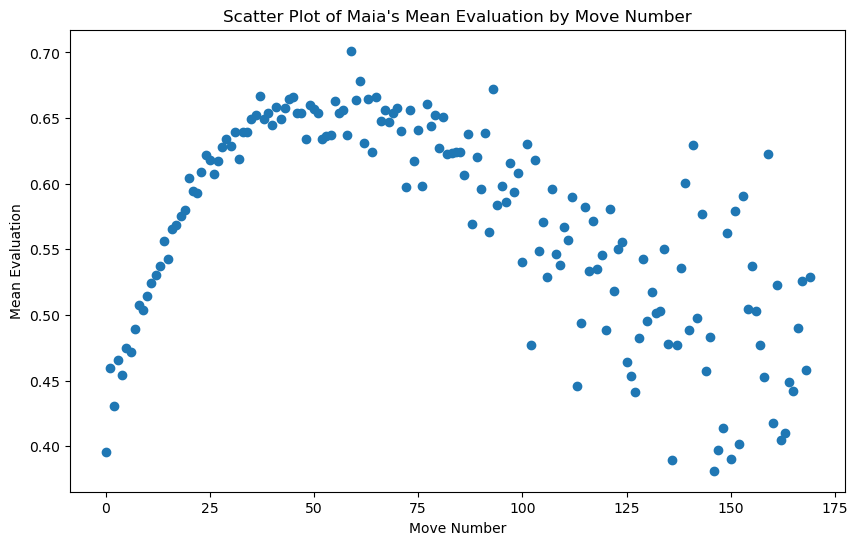

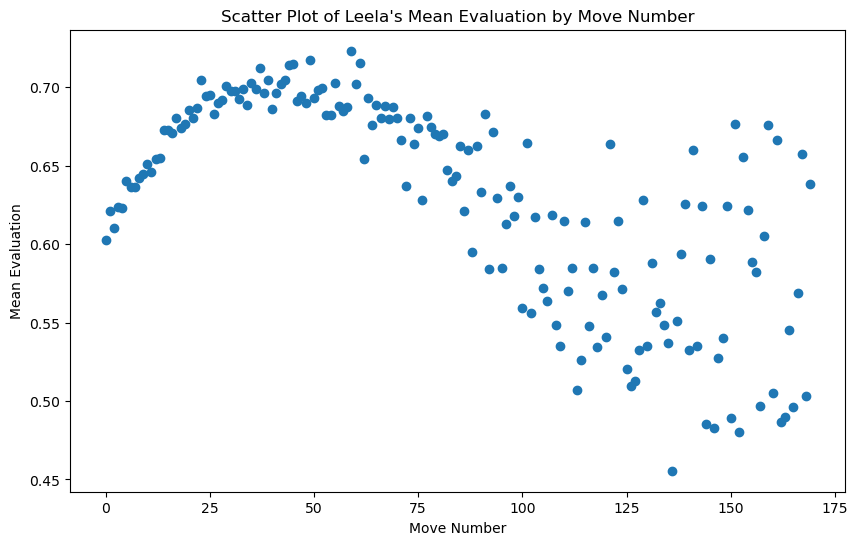

In [47]:
mean_evaluation_by_move = disagreement_df.groupby('ply')['maia1200_eval'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_eval'], label="Maia's Evaluation")
plt.title("Scatter Plot of Maia's Mean Evaluation by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Evaluation')
mean_evaluation_by_move = disagreement_df.groupby('ply')['leela10b2500_eval'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_eval'], label="Leela's Evaluation")
plt.title("Scatter Plot of Leela's Mean Evaluation by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Evaluation')

Text(0, 0.5, 'Mean Confidence')

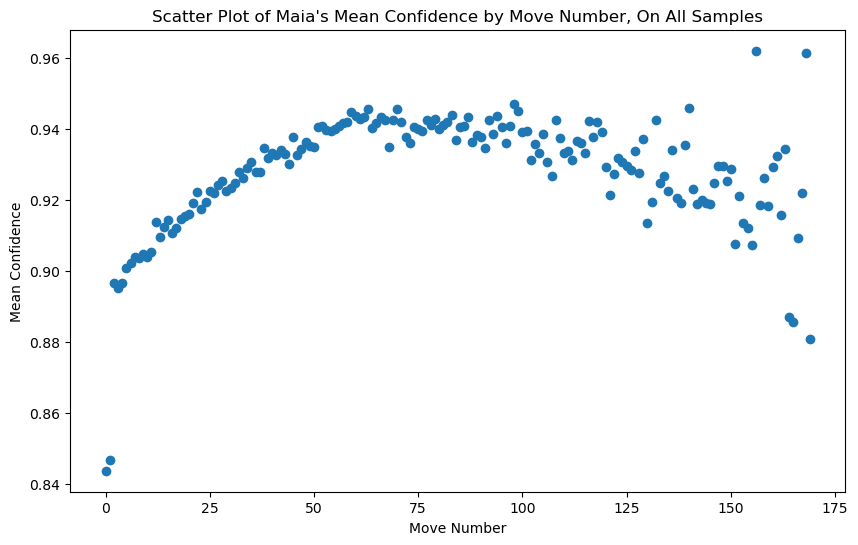

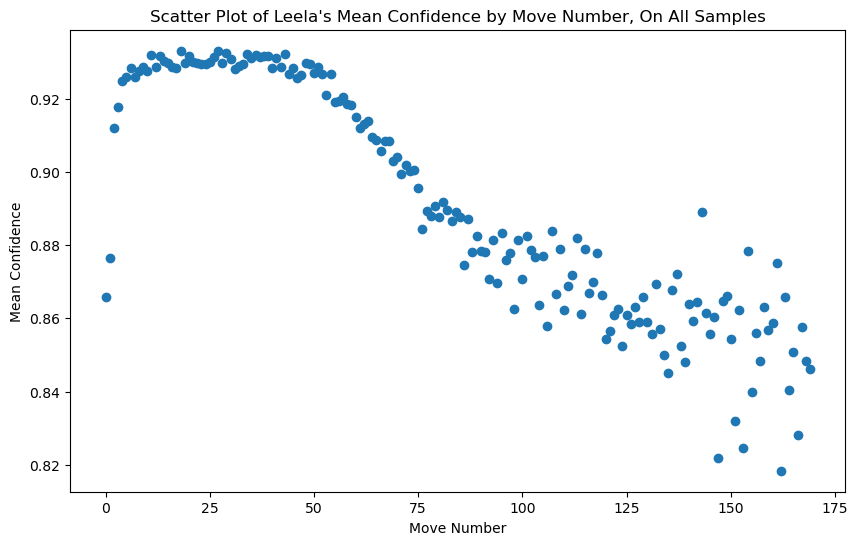

In [48]:
mean_evaluation_by_move = games_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = games_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

Text(0, 0.5, 'Mean Confidence')

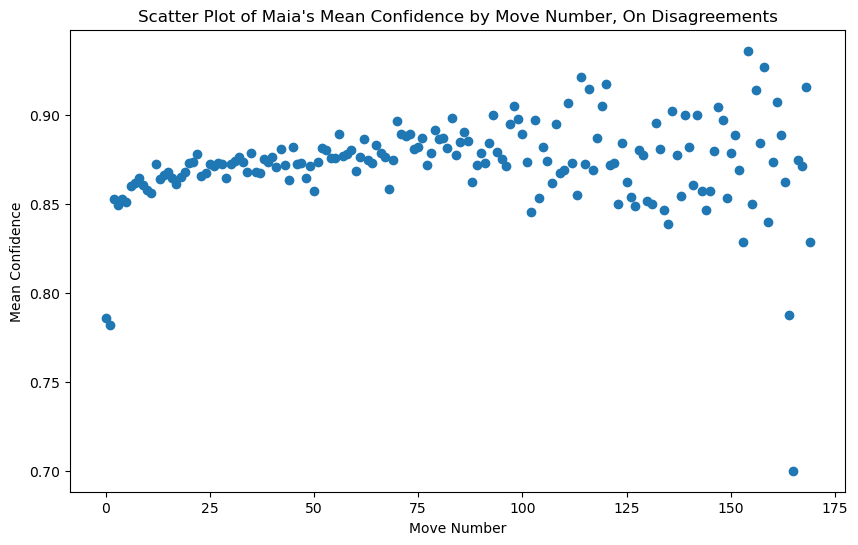

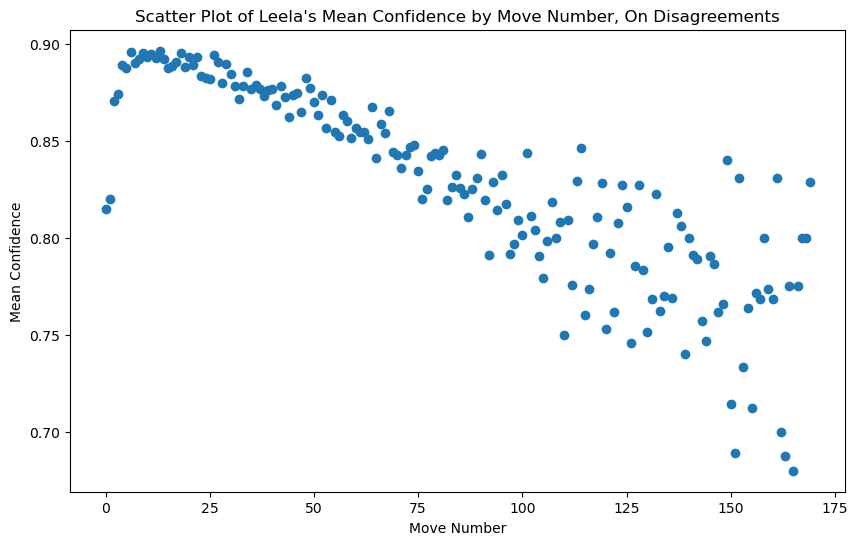

In [49]:
mean_evaluation_by_move = disagreement_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number, On Disagreements")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = disagreement_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number, On Disagreements")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

In [50]:
print("Mean values of board features when Maia is better:")
for i in range(len(mean_vec_maia)):
    print(f"Feature: {board_feature_names[i]}, mean: {mean_vec_maia[i]}")

Mean values of board features when Maia is better:
Feature: color, mean: 0.500896556
Feature: move_num, mean: 38.7775923
Feature: legal_moves_player, mean: 32.4530699
Feature: legal_moves_opponent, mean: 30.650405
Feature: legal_captures_player, mean: 2.06180053
Feature: legal_captures_opponent, mean: 2.13077351
Feature: in_check, mean: 0.0425091201
Feature: check_to_give_player, mean: 0.590273913
Feature: check_to_give_opponent, mean: 0.505812156
Feature: queen_threatened_player, mean: 0.0594818525
Feature: queen_threatened_opponent, mean: 0.0200024733
Feature: castling_rights_player, mean: 0.05147468
Feature: castling_rights_opponent, mean: 0.0774748037
Feature: enough_material_to_win_player, mean: 0.00788350955
Feature: enough_material_to_win_opponent, mean: 0.0137265813
Feature: number_pieces_player, mean: 9.88997094
Feature: number_pieces_opponent, mean: 9.38310765
Feature: materiel_points_player, mean: 23.7378656
Feature: material_points_opponent, mean: 22.3540469
Feature: knight

In [51]:
print("Mean values of board features when Leela is better:")
for i in range(len(mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {mean_vec_leela[i]}")

Mean values of board features when Leela is better:
Feature: color, mean: 0.516909497
Feature: move_num, mean: 30.7093658
Feature: legal_moves_player, mean: 33.6103549
Feature: legal_moves_opponent, mean: 33.2340742
Feature: legal_captures_player, mean: 2.25890673
Feature: legal_captures_opponent, mean: 2.30614343
Feature: in_check, mean: 0.0365840689
Feature: check_to_give_player, mean: 0.499326456
Feature: check_to_give_opponent, mean: 0.471888404
Feature: queen_threatened_player, mean: 0.0598213336
Feature: queen_threatened_opponent, mean: 0.0241589564
Feature: castling_rights_player, mean: 0.0816760608
Feature: castling_rights_opponent, mean: 0.108245595
Feature: enough_material_to_win_player, mean: 0.00397036407
Feature: enough_material_to_win_opponent, mean: 0.00288914885
Feature: number_pieces_player, mean: 10.9407281
Feature: number_pieces_opponent, mean: 10.6987841
Feature: materiel_points_player, mean: 26.5765004
Feature: material_points_opponent, mean: 26.1630862
Feature: kn

In [52]:
print("Features with distance of at least 2 x SEM from mean:")
for i in range(len(board_feature_names)):
    if abs(mean_vec_maia[i] - mean_vec_leela[i]) > 2 * sem[i]:
        print(board_feature_names[i])

Features with distance of at least 2 x SEM from mean:
color
move_num
legal_moves_player
legal_moves_opponent
legal_captures_player
legal_captures_opponent
in_check
check_to_give_player
check_to_give_opponent
queen_threatened_opponent
castling_rights_player
castling_rights_opponent
enough_material_to_win_player
enough_material_to_win_opponent
number_pieces_player
number_pieces_opponent
materiel_points_player
material_points_opponent
knights_num_player
knights_num_opponent
bishops_num_player
bishops_num_opponent
rooks_num_player
rooks_num_opponent
pawns_num_player
pawns_num_opponent
queens_num_player
queens_num_opponent
num_pieces_in_center_player
num_pieces_in_center_opponent
attack_balance_center1
attack_balance_center2
attack_balance_center3
king_safety_player1
king_safety_player2
king_safety_player3
king_safety_opponent1
king_safety_opponent2
king_safety_opponent3
king_freedom_to_move_opponent
proportion_defended_pieces_player
proportion_defended_pieces_opponent
control1
control2
con

In [53]:
def calculate_mean_of_board_feats(df):
    vector_list = []
    for position in df['position']:
        board_feat_instance = board_features(position)
        extracted_vector = board_feat_instance.extract()
        vector_list.append(extracted_vector)

    vector_array = np.array(vector_list)
    mean_vector = np.mean(vector_array, axis=0)
    return mean_vector

In [54]:
games_df["maia_better"] = games_df['maia1200_eval'] > games_df['leela10b2500_eval']
games_df["leela_better"] = games_df['leela10b2500_eval'] > games_df['maia1200_eval']
maia_better_df = games_df[games_df['maia_better'] == True]
leela_better_df = games_df[games_df['leela_better'] == True]
maia_better_df['eval_diff'] = maia_better_df['maia1200_eval'] - maia_better_df['leela10b2500_eval']
leela_better_df['eval_diff'] = leela_better_df['leela10b2500_eval'] - leela_better_df['maia1200_eval']
top_maia_samples = maia_better_df.nlargest(1000, 'eval_diff')
top_leela_samples = leela_better_df.nlargest(1000, 'eval_diff')
top_mean_vec_maia = calculate_mean_of_board_feats(top_maia_samples)
print("Mean values of board features in the top 1000 moves in favor of Maia:")
for i in range(len(top_mean_vec_maia)):
    print(f"Feature: {board_feature_names[i]}, mean: {top_mean_vec_maia[i]}")

C:\Users\dvirs\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dvirs\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mean values of board features in the top 1000 moves in favor of Maia:
Feature: color, mean: 0.474
Feature: move_num, mean: 36.362
Feature: legal_moves_player, mean: 33.91
Feature: legal_moves_opponent, mean: 35.434
Feature: legal_captures_player, mean: 2.601
Feature: legal_captures_opponent, mean: 2.826
Feature: in_check, mean: 0.042
Feature: check_to_give_player, mean: 0.69
Feature: check_to_give_opponent, mean: 0.698
Feature: queen_threatened_player, mean: 0.103
Feature: queen_threatened_opponent, mean: 0.027
Feature: castling_rights_player, mean: 0.035
Feature: castling_rights_opponent, mean: 0.056
Feature: enough_material_to_win_player, mean: 0.0
Feature: enough_material_to_win_opponent, mean: 0.0
Feature: number_pieces_player, mean: 9.872
Feature: number_pieces_opponent, mean: 9.974
Feature: materiel_points_player, mean: 24.863
Feature: material_points_opponent, mean: 25.242
Feature: knights_num_player, mean: 0.687
Feature: knights_num_opponent, mean: 0.732
Feature: bishops_num_pl

In [55]:
top_mean_vec_leela = calculate_mean_of_board_feats(top_leela_samples)
print("Mean values of board features in the top 1000 moves in favor of Leela:")
for i in range(len(top_mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {top_mean_vec_leela[i]}")

Mean values of board features in the top 1000 moves in favor of Leela:
Feature: color, mean: 0.486
Feature: move_num, mean: 30.862
Feature: legal_moves_player, mean: 35.279
Feature: legal_moves_opponent, mean: 36.048
Feature: legal_captures_player, mean: 2.792
Feature: legal_captures_opponent, mean: 2.884
Feature: in_check, mean: 0.053
Feature: check_to_give_player, mean: 0.564
Feature: check_to_give_opponent, mean: 0.637
Feature: queen_threatened_player, mean: 0.126
Feature: queen_threatened_opponent, mean: 0.053
Feature: castling_rights_player, mean: 0.061
Feature: castling_rights_opponent, mean: 0.072
Feature: enough_material_to_win_player, mean: 0.0
Feature: enough_material_to_win_opponent, mean: 0.0
Feature: number_pieces_player, mean: 10.772
Feature: number_pieces_opponent, mean: 10.788
Feature: materiel_points_player, mean: 27.203
Feature: material_points_opponent, mean: 27.409
Feature: knights_num_player, mean: 0.836
Feature: knights_num_opponent, mean: 0.889
Feature: bishops_n

Now, we'll check the move properties in disagreements, when Maia's move is better, and when Leela's move is better.

In [56]:
move_feats_diss_maia = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_diss_maia = np.array(move_feats_diss_maia)
mean_vector_diss_maia = np.mean(vector_array_diss_maia, axis=0)
variance_vector_diss_maia = np.var(vector_array_diss_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                 6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_maia, variance_vector_diss_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")


Maia's move features in disagreements:
distance: Mean = 1.815, Variance = 1.322
king approach: Mean = -0.746, Variance = 1.737
advance/ retreat: Mean = 0.135, Variance = 0.117
flanking: Mean = 0.774, Variance = 0.175
pawn: Mean = 0.243, Variance = 0.184
rook: Mean = 0.193, Variance = 0.156
knight: Mean = 0.17, Variance = 0.141
bishop: Mean = 0.168, Variance = 0.14
queen: Mean = 0.131, Variance = 0.114
king: Mean = 0.095, Variance = 0.086
check: Mean = 0.102, Variance = 0.092
capture: Mean = 0.235, Variance = 0.18
castle: Mean = 0.012, Variance = 0.012


In [57]:
move_feats_diss_leela = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_diss_leela = np.array(move_feats_diss_leela)
mean_vector_diss_leela = np.mean(vector_array_diss_leela, axis=0)
variance_vector_diss_leela = np.var(vector_array_diss_leela, axis=0)
print("Leela's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_leela, variance_vector_diss_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features in disagreements:
distance: Mean = 1.763, Variance = 1.098
king approach: Mean = -0.546, Variance = 1.729
advance/ retreat: Mean = 0.173, Variance = 0.143
flanking: Mean = 0.776, Variance = 0.174
pawn: Mean = 0.233, Variance = 0.179
rook: Mean = 0.21, Variance = 0.166
knight: Mean = 0.148, Variance = 0.126
bishop: Mean = 0.158, Variance = 0.133
queen: Mean = 0.147, Variance = 0.126
king: Mean = 0.103, Variance = 0.093
check: Mean = 0.041, Variance = 0.04
capture: Mean = 0.135, Variance = 0.117
castle: Mean = 0.007, Variance = 0.007


In [58]:
move_feats_maia = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
print("Maia's move features when it's better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when it's better:
distance: Mean = 1.842, Variance = 1.38
king approach: Mean = -0.682, Variance = 1.843
advance/ retreat: Mean = 0.158, Variance = 0.133
flanking: Mean = 0.774, Variance = 0.175
pawn: Mean = 0.225, Variance = 0.174
rook: Mean = 0.212, Variance = 0.167
knight: Mean = 0.153, Variance = 0.13
bishop: Mean = 0.154, Variance = 0.13
queen: Mean = 0.152, Variance = 0.129
king: Mean = 0.105, Variance = 0.094
check: Mean = 0.122, Variance = 0.107
capture: Mean = 0.19, Variance = 0.154
castle: Mean = 0.009, Variance = 0.009


In [59]:
move_feats_leela = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
print("Leela's move features when Maia's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when Maia's move is better:
distance: Mean = 1.764, Variance = 1.197
king approach: Mean = -0.522, Variance = 1.766
advance/ retreat: Mean = 0.173, Variance = 0.143
flanking: Mean = 0.784, Variance = 0.17
pawn: Mean = 0.225, Variance = 0.174
rook: Mean = 0.219, Variance = 0.171
knight: Mean = 0.136, Variance = 0.118
bishop: Mean = 0.151, Variance = 0.128
queen: Mean = 0.155, Variance = 0.131
king: Mean = 0.114, Variance = 0.101
check: Mean = 0.06, Variance = 0.056
capture: Mean = 0.167, Variance = 0.139
castle: Mean = 0.006, Variance = 0.006


In [60]:
move_feats_maia = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features when Leela's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when Leela's move is better:
distance: Mean = 1.8, Variance = 1.288
king approach: Mean = -0.783, Variance = 1.672
advance/ retreat: Mean = 0.122, Variance = 0.107
flanking: Mean = 0.773, Variance = 0.175
pawn: Mean = 0.253, Variance = 0.189
rook: Mean = 0.183, Variance = 0.149
knight: Mean = 0.18, Variance = 0.147
bishop: Mean = 0.176, Variance = 0.145
queen: Mean = 0.119, Variance = 0.105
king: Mean = 0.089, Variance = 0.081
check: Mean = 0.091, Variance = 0.082
capture: Mean = 0.262, Variance = 0.193
castle: Mean = 0.014, Variance = 0.014


In [61]:
move_feats_leela = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features when it's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when it's move is better:
distance: Mean = 1.763, Variance = 1.041
king approach: Mean = -0.56, Variance = 1.707
advance/ retreat: Mean = 0.172, Variance = 0.143
flanking: Mean = 0.772, Variance = 0.176
pawn: Mean = 0.238, Variance = 0.181
rook: Mean = 0.205, Variance = 0.163
knight: Mean = 0.155, Variance = 0.131
bishop: Mean = 0.161, Variance = 0.135
queen: Mean = 0.143, Variance = 0.123
king: Mean = 0.097, Variance = 0.088
check: Mean = 0.031, Variance = 0.03
capture: Mean = 0.116, Variance = 0.103
castle: Mean = 0.008, Variance = 0.008


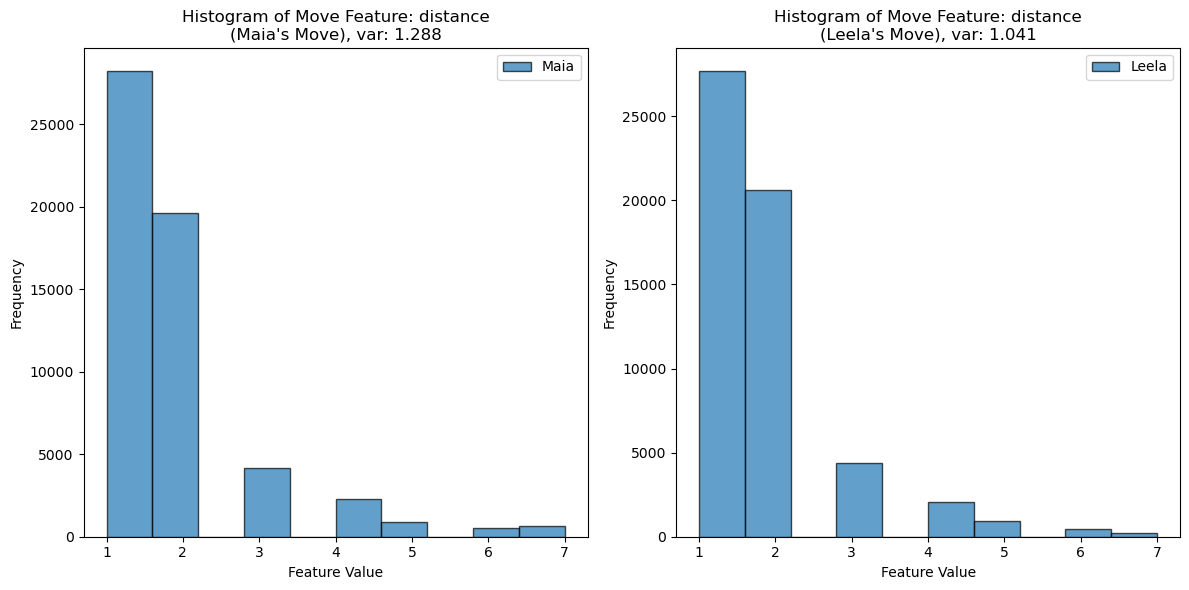

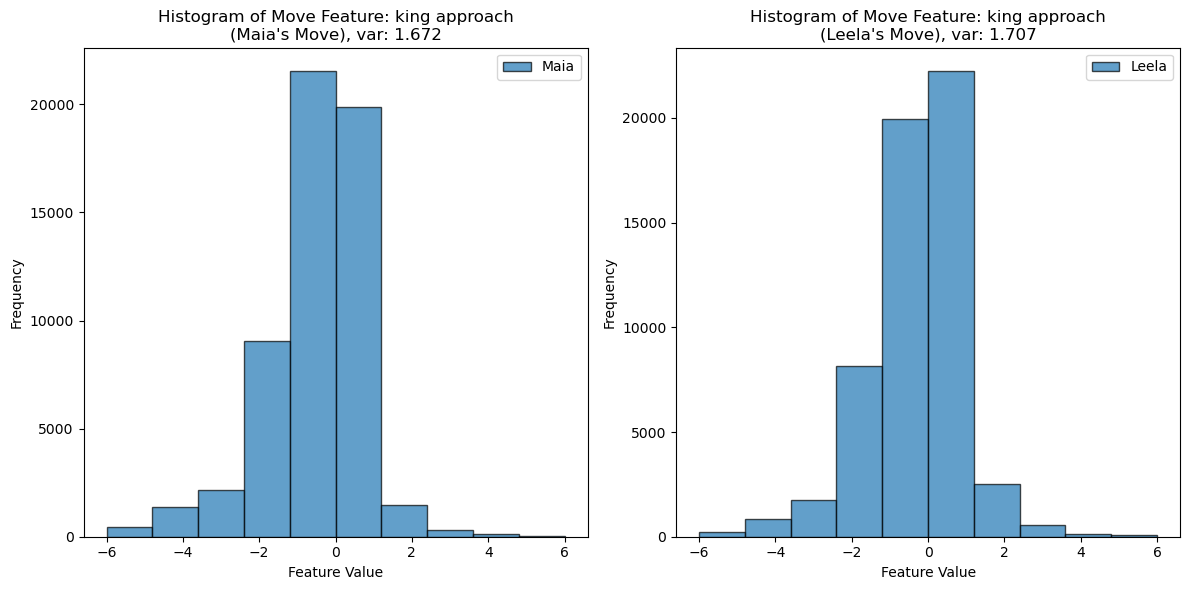

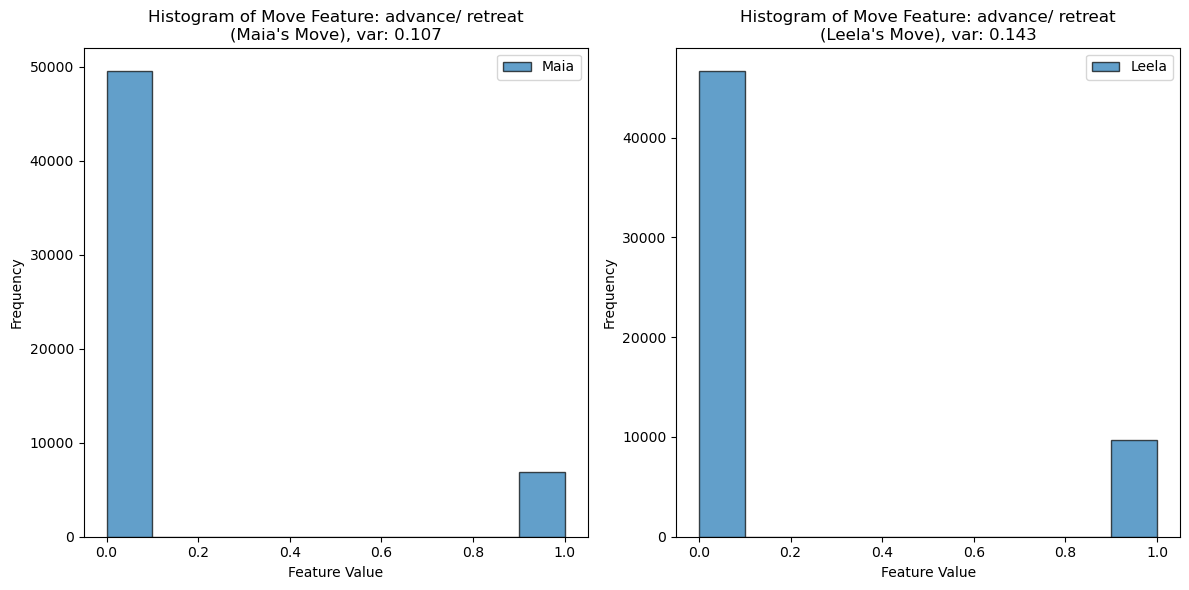

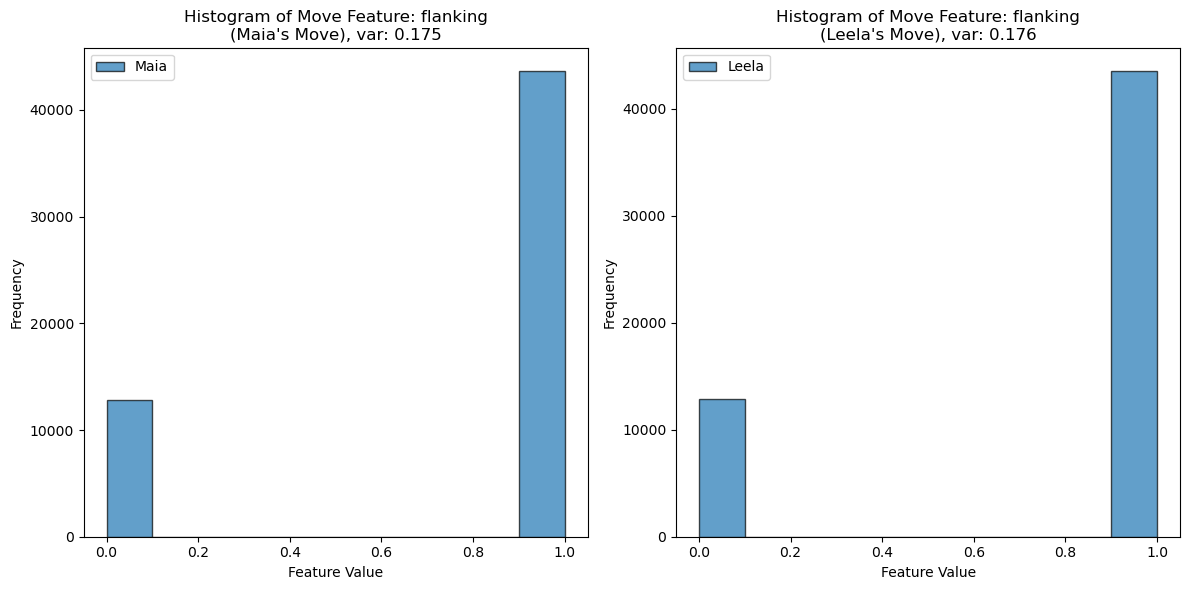

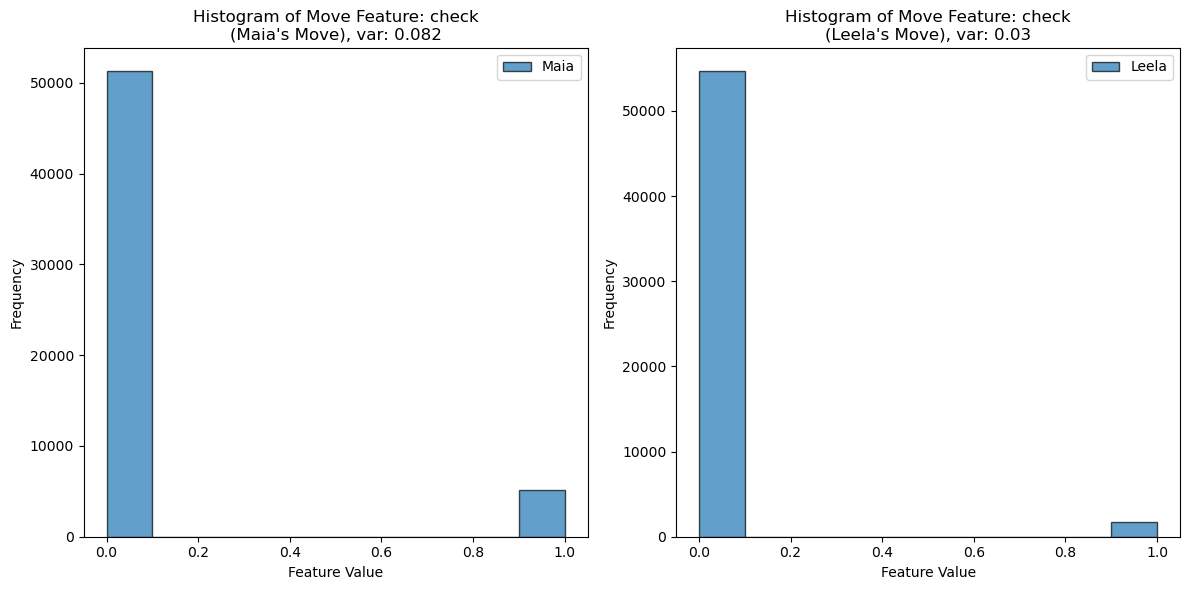

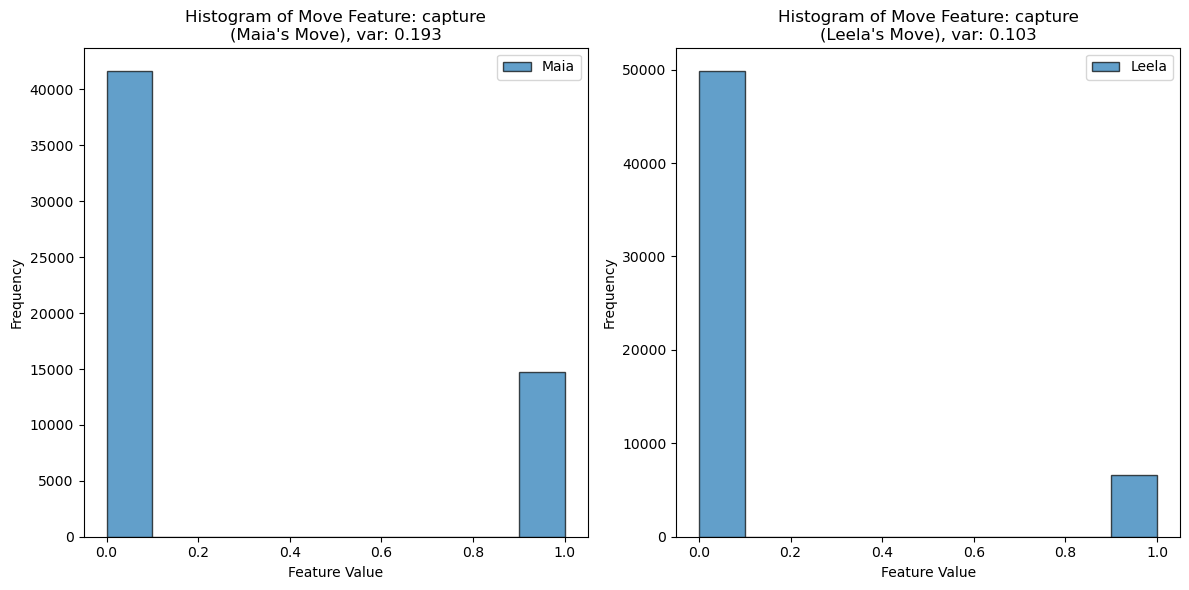

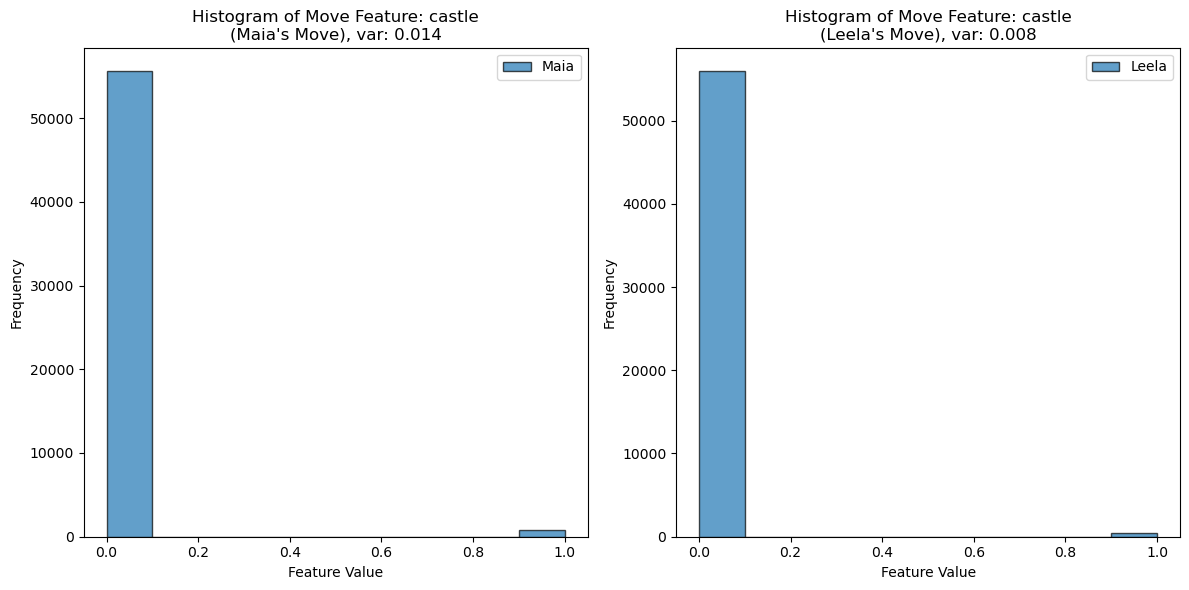

In [62]:
for i in range(vector_array_maia.shape[1]):
    if 4 <= i <= 9:
        continue
    plt.figure(figsize=(12, 6))

    # Create Maia's histogram
    plt.subplot(1, 2, 1)
    plt.hist(vector_array_maia[:, i], bins=10, edgecolor='black', alpha=0.7, label='Maia')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Maia's Move), var: {variance_vector_maia[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    # Create Leela's histogram
    plt.subplot(1, 2, 2)
    plt.hist(vector_array_leela[:, i], bins=10, edgecolor='black', alpha=0.7, label='Leela')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Leela's Move), var: {variance_vector_leela[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

Now, we'll look for the situations in which the difference between Maia's eval and Leela's eval was the largest in favor of Maia, and check if we can find a pattern.

Maia's move: e6h6, Leela's move: e6e3, result: lose, Maia's eval: 1.0, Leela's eval: 0.0


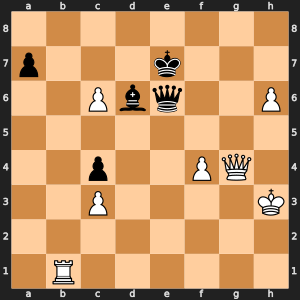

Maia's move: f7f6, Leela's move: d6d5, result: lose, Maia's eval: 1.0, Leela's eval: 0.0


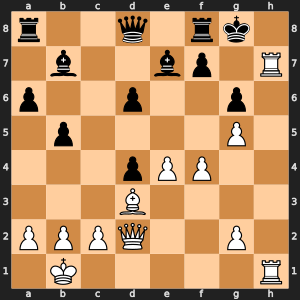

Maia's move: f7f6, Leela's move: e8e2, result: win, Maia's eval: 1.0, Leela's eval: 0.0


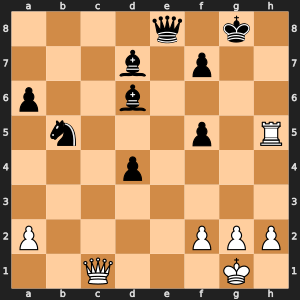

Maia's move: c8g4, Leela's move: c8f8, result: win, Maia's eval: 1.0, Leela's eval: 0.0


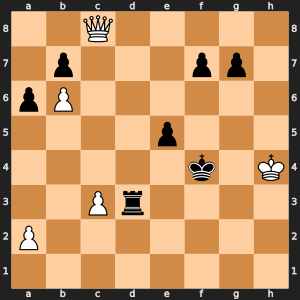

Maia's move: d7e5, Leela's move: f5e7, result: win, Maia's eval: 1.0, Leela's eval: 0.0


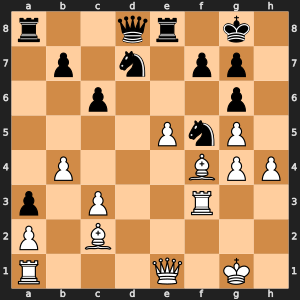

In [64]:
games_df['eval_diff'] = games_df['maia1200_eval'] - games_df['leela10b2500_eval']
top_samples = games_df.nlargest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    print(f"Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}")
    display(SVG(chess.svg.board(board, size=300)))

We can see that for all these top moves, Maia's eval is 1, while Leela's eval is 0. That's surprising, so it'd be good to check how many times this happens.

In [65]:
maia_1_leela_0 = games_df[games_df['maia1200_eval'] == 1]
maia_1_leela_0 = maia_1_leela_0[maia_1_leela_0['leela10b2500_eval'] == 0]
print(f"Number of situations where Maia has 1 eval and Leela 0: {len(maia_1_leela_0)}")

Number of situations where Maia has 1 eval and Leela 0: 68


The situations in which Leela's eval was much better:

Maia's move: g8f8, Leela's move: d7e7, result: win, Maia's eval: 0.0, Leela's eval: 1.0


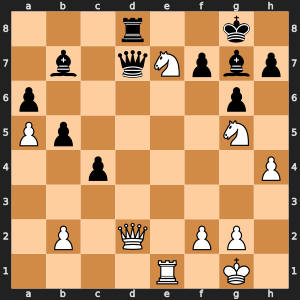

Maia's move: c6e4, Leela's move: f6f3, result: win, Maia's eval: 0.0, Leela's eval: 1.0


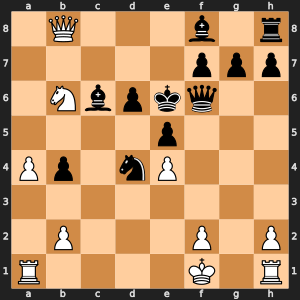

Maia's move: d7e7, Leela's move: d7c8, result: win, Maia's eval: 0.0, Leela's eval: 1.0


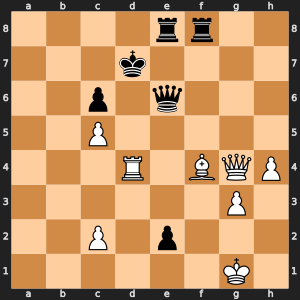

Maia's move: g4d7, Leela's move: d2d7, result: win, Maia's eval: 0.0, Leela's eval: 1.0


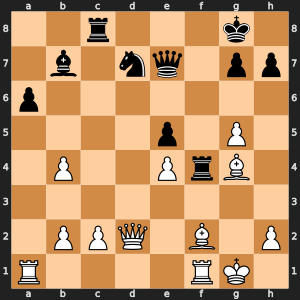

Maia's move: d3c3, Leela's move: h1c1, result: win, Maia's eval: 0.0, Leela's eval: 1.0


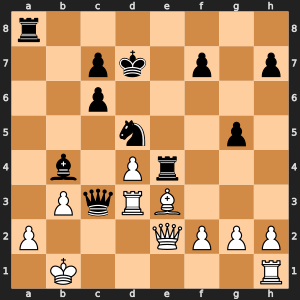

In [66]:
games_df["eval_diff"] = games_df["maia1200_eval"] - games_df["leela10b2500_eval"]
top_samples = games_df.nsmallest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    print(f"Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}")
    display(SVG(chess.svg.board(board, size=300)))

In [67]:
maia_0_leela_1 = games_df[games_df['maia1200_eval'] == 0]
maia_0_leela_1 = maia_0_leela_1[maia_0_leela_1['leela10b2500_eval'] == 1]
print(f"Number of situations where Maia has 0 eval and Leela 1: {len(maia_0_leela_1)}")

Number of situations where Maia has 0 eval and Leela 1: 46


In [68]:
maia_counts = disagreement_df.groupby('game')['contributor'].value_counts().unstack().fillna(0)['maia1200']
game_counts = disagreement_df['game'].value_counts().sort_index()
cur_game, cur_count, cur_total = -1, -1, -1
disagreement_df['maia_percent'] = 0
for index, row in disagreement_df.iterrows():
    if cur_game != row['game']:
        cur_game = row['game']
        cur_total = game_counts[cur_game]
        cur_count = maia_counts[cur_game]
    if row['contributor'] == 'maia1200':
        cur_count -= 1
        cur_total -= 1
    else:
        cur_total -= 1
    if cur_total == 0:
        disagreement_df.loc[index, 'maia_percent'] = 100
        continue
    disagreement_df.loc[index, 'maia_percent'] = (cur_count / cur_total) * 100

C:\Users\dvirs\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dvirs\anaconda3\envs\iml.env\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


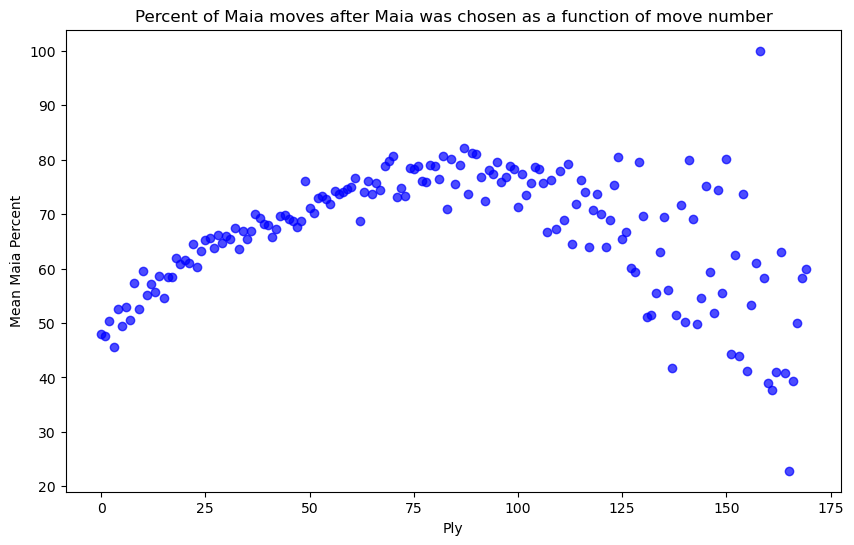

In [69]:
maia_per_df = disagreement_df[disagreement_df['contributor'] == 'maia1200']
maia_per_df = maia_per_df[maia_per_df['ply'] < 170]
plt.figure(figsize=(10, 6))  # Set the figure size
mean_percent_by_move = maia_per_df.groupby('ply')['maia_percent'].mean()

plt.scatter(mean_percent_by_move.index, mean_percent_by_move.values, color='blue', marker='o', alpha=0.7)
plt.title('Percent of Maia moves after Maia was chosen as a function of move number')
plt.xlabel('Ply')
plt.ylabel('Mean Maia Percent')
plt.show()

In [70]:
leela_counts = disagreement_df.groupby('game')['contributor'].value_counts().unstack().fillna(0)['leela10b2500']
cur_game, cur_count, cur_total = -1, -1, -1
disagreement_df['leela_percent'] = 0
for index, row in disagreement_df.iterrows():
    if cur_game != row['game']:
        cur_game = row['game']
        cur_total = game_counts[cur_game]
        cur_count = leela_counts[cur_game]
    if row['contributor'] == 'leela10b2500':
        cur_count -= 1
        cur_total -= 1
    else:
        cur_total -= 1
    if cur_total == 0:
        disagreement_df.loc[index, 'leela_percent'] = 100
        continue
    disagreement_df.loc[index, 'leela_percent'] = (cur_count / cur_total) * 100

C:\Users\dvirs\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


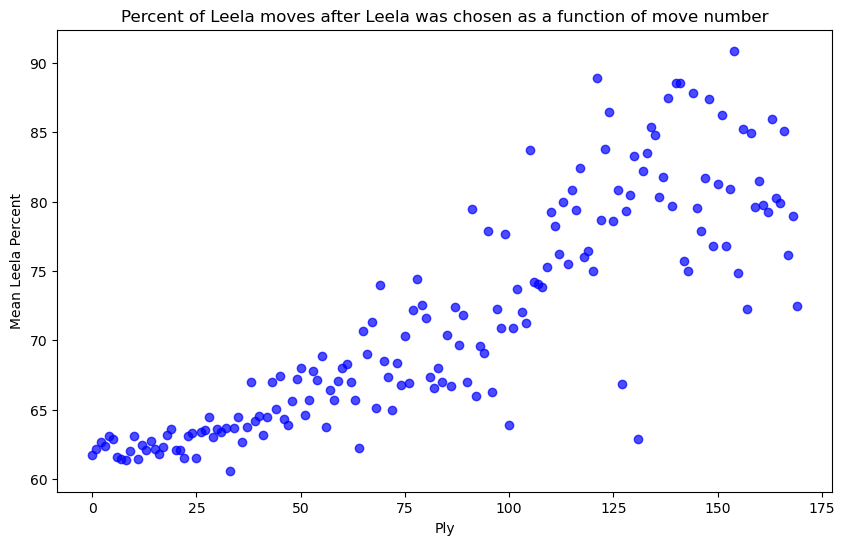

In [71]:
leela_per_df = disagreement_df[disagreement_df['contributor'] == 'leela10b2500']
leela_per_df = leela_per_df[leela_per_df['ply'] < 170]
plt.figure(figsize=(10, 6))  # Set the figure size
leela_percent_by_move = leela_per_df.groupby('ply')['leela_percent'].mean()

plt.scatter(leela_percent_by_move.index, leela_percent_by_move.values, color='blue', marker='o', alpha=0.7)
plt.title('Percent of Leela moves after Leela was chosen as a function of move number')
plt.xlabel('Ply')
plt.ylabel('Mean Leela Percent')
plt.show()

Now we'll check if choosing Maia at a certain point affects the odds of it being chosen on the next turn.

In [72]:
def calculate_percent_after_chosen(total, bot_name):
    ctr = 0
    cur_game = -1
    cur_bot = False
    for index, row in disagreement_df.iterrows():
        cur_ply = row['ply']
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bot = False
            continue
        if row['contributor'] == bot_name:
            if cur_bot:
                ctr += 1
            cur_bot = True
        else:
            cur_bot = False
    return (ctr / total) * 100

In [73]:
percent_maia = calculate_percent_after_chosen(len(maia_better_df), 'maia1200')
percent_leela = calculate_percent_after_chosen(len(leela_better_df), 'leela10b2500')
print(f"Percentage of times Maia is chosen in disagreements: {(len(maia_df) / len(disagreement_df) * 100).__round__(3)}%")
print(f"Percentage of times Maia is chosen after it was chosen the previous move: {percent_maia.__round__(3)}%")
print(f"Percentage of times Leela is chosen in disagreements: {(len(leela_df) / len(disagreement_df) * 100).__round__(3)}%")
print(f"Percentage of times Leela is chosen after it was chosen the previous move: {percent_leela.__round__(3)}%")

Percentage of times Maia is chosen in disagreements: 36.44%
Percentage of times Maia is chosen after it was chosen the previous move: 50.587%
Percentage of times Leela is chosen in disagreements: 63.56%
Percentage of times Leela is chosen after it was chosen the previous move: 60.789%
